# DengAI: Predicting Dengue Disease Spread

This is a [challenge hosted by DrivenData](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/80/).

**The Challenge:**

> Using environmental data collected by U.S. Federal Government agencies, can you predict the number of dengue fever cases reported each week in San Juan, Puerto Rico and Iquitos, Peru?

[Challenge Page](https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/80/)

The dataset consists of four files:

1. `dengue_features_train.csv` - Training data with features
2. `dengue_labels_train.csv` - Training data with labels
3. `dengue_features_test.csv` - Test data with features
4. `submission_format.csv` - Submission format with the correct column names

You can run this notebook in Google Colab:

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/saracotechang/dengue/blob/main/dengue.ipynb)


## Data Loading and Exploration

TODO: Explain the data set and what all the columns mean.


In [3]:
import pandas as pd
import os

local_path = 'data/dengue_features_train.csv'
url = 'https://github.com/trgardos/dengue/raw/refs/heads/main/data/dengue_features_train.csv'

if os.path.exists(local_path):
    print(f"Loading local file: {local_path}")
    dengue_features_train_df = pd.read_csv(local_path)
else:
    print(f"Loading remote file: {url}")
    dengue_features_train_df = pd.read_csv(url)

local_path = 'data/dengue_labels_train.csv'
url = 'https://github.com/trgardos/dengue/raw/refs/heads/main/data/dengue_labels_train.csv'

if os.path.exists(local_path):
    print(f"Loading local file: {local_path}")
    dengue_labels_train_df = pd.read_csv(local_path)
else:
    print(f"Loading remote file: {url}")
    dengue_labels_train_df = pd.read_csv(url)

local_path = 'data/dengue_features_test.csv'
url = 'https://github.com/trgardos/dengue/raw/refs/heads/main/data/dengue_features_test.csv'

if os.path.exists(local_path):
    print(f"Loading local file: {local_path}")
    dengue_features_test_df = pd.read_csv(local_path)
else:
    print(f"Loading remote file: {url}")
    dengue_features_test_df = pd.read_csv(url)


Loading remote file: https://github.com/trgardos/dengue/raw/refs/heads/main/data/dengue_features_train.csv
Loading remote file: https://github.com/trgardos/dengue/raw/refs/heads/main/data/dengue_labels_train.csv
Loading remote file: https://github.com/trgardos/dengue/raw/refs/heads/main/data/dengue_features_test.csv


In [4]:
dengue_labels_train_df.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [3]:
dengue_features_train_df.head()


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [ ]:
dengue

In [5]:
# Merge the total_cases column from dengue_labels_train_df to dengue_features_train_df
dengue_features_train_df = dengue_features_train_df.merge(dengue_labels_train_df[['city', 'year', 'weekofyear', 'total_cases']],
                                                          on=['city', 'year', 'weekofyear'],
                                                          how='left')

# Display the first few rows to verify the merge
dengue_features_train_df.head()


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


## Train a Decision Tree Regressor

See SciKit-Learn's [Decision Trees](https://scikit-learn.org/stable/modules/tree.html)
for more information.


[Decision Tree Regressor](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)

TBD


In [127]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Prepare the data
X = dengue_features_train_df.drop(columns=['total_cases'])
y = dengue_features_train_df['total_cases']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['city', 'week_start_date'])

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=48)

# Train the random forest regressor
rf_model = DecisionTreeRegressor(max_depth=9, random_state=49)
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf_model.predict(X_valid)

# Calculate the mean absolute error
mae = mean_absolute_error(y_valid, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 10.74403232006409


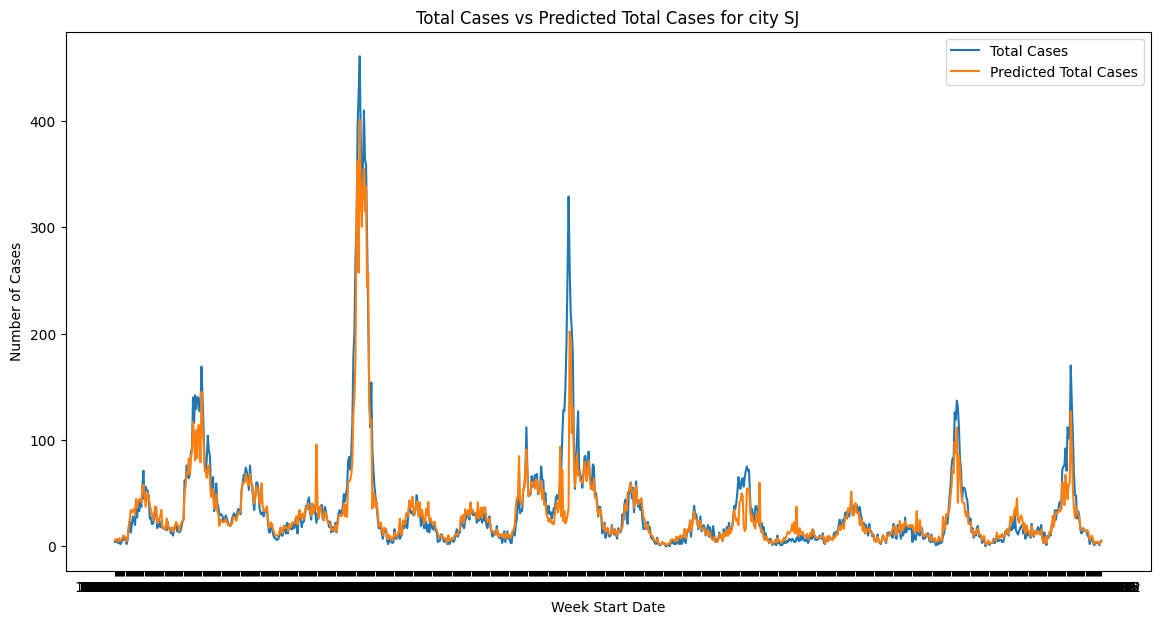

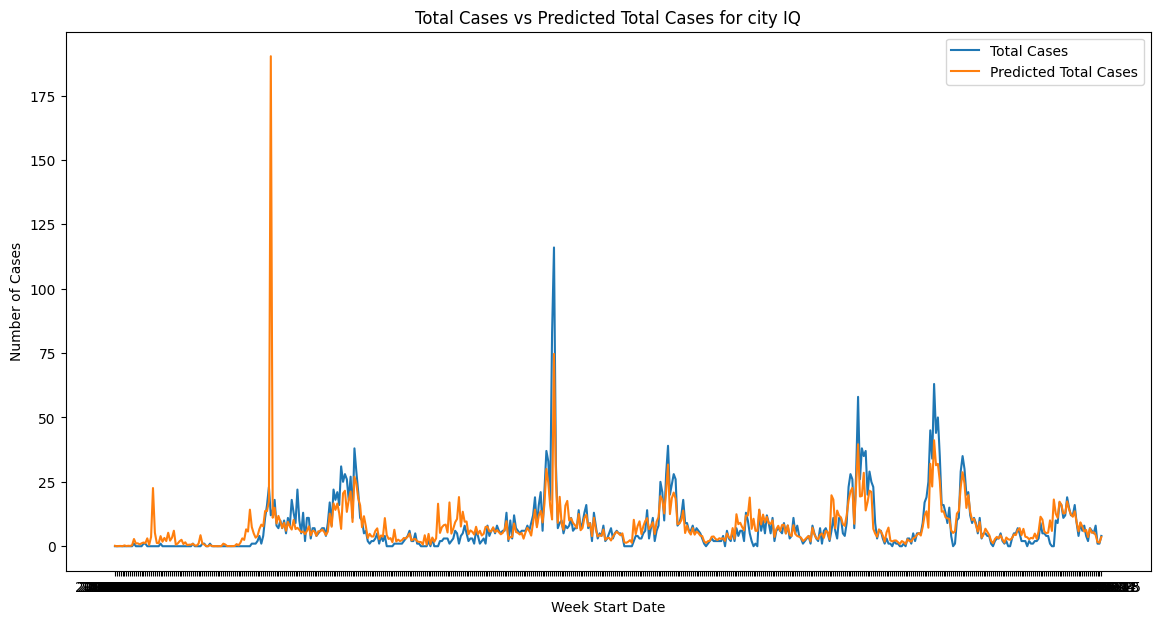

In [9]:
import matplotlib.pyplot as plt

# Filter the data for city 'sj'
sj_data = dengue_features_train_df[dengue_features_train_df['city'] == 'sj']

# Plot total_cases and predicted_total_cases for city 'sj'
plt.figure(figsize=(14, 7))
plt.plot(sj_data['week_start_date'], sj_data['total_cases'], label='Total Cases')
plt.plot(sj_data['week_start_date'], sj_data['predicted_total_cases'], label='Predicted Total Cases')
plt.xlabel('Week Start Date')
plt.ylabel('Number of Cases')
plt.title('Total Cases vs Predicted Total Cases for city SJ')
plt.legend()
plt.show()

# Filter the data for city 'iq'
iq_data = dengue_features_train_df[dengue_features_train_df['city'] == 'iq']

# Plot total_cases and predicted_total_cases for city 'iq'
plt.figure(figsize=(14, 7))
plt.plot(iq_data['week_start_date'], iq_data['total_cases'], label='Total Cases')
plt.plot(iq_data['week_start_date'], iq_data['predicted_total_cases'], label='Predicted Total Cases')
plt.xlabel('Week Start Date')
plt.ylabel('Number of Cases')
plt.title('Total Cases vs Predicted Total Cases for city IQ')
plt.legend()
plt.show()


## Train a Random Forest Regressor

See SciKit-Learn's [Decision Trees](https://scikit-learn.org/stable/modules/tree.html)
and [Random Forests](https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles)
for more information.


In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Prepare the data
X = dengue_features_train_df.drop(columns=['total_cases'])
y = dengue_features_train_df['total_cases']

# One-hot encode categorical variables
X = pd.get_dummies(X, columns=['city', 'week_start_date'])

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=50)

# Train the random forest regressor
rf_model = RandomForestRegressor(n_estimators=105, random_state=55)
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf_model.predict(X_valid)

# Calculate the mean absolute error
mae = mean_absolute_error(y_valid, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 5.77945205479452


In [141]:
# Add a column predicted_total_cases to dengue_features_train_df which is the predicted number of cases for each row

# Predict the total cases for the entire dataset
dengue_features_train_df['predicted_total_cases'] = rf_model.predict(X)

# Display the first few rows to verify the new column
dengue_features_train_df.head()


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,predicted_total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,3.904762
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,5.342857
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,3.580952
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,2.742857
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,5.314286


## Visualize the Results


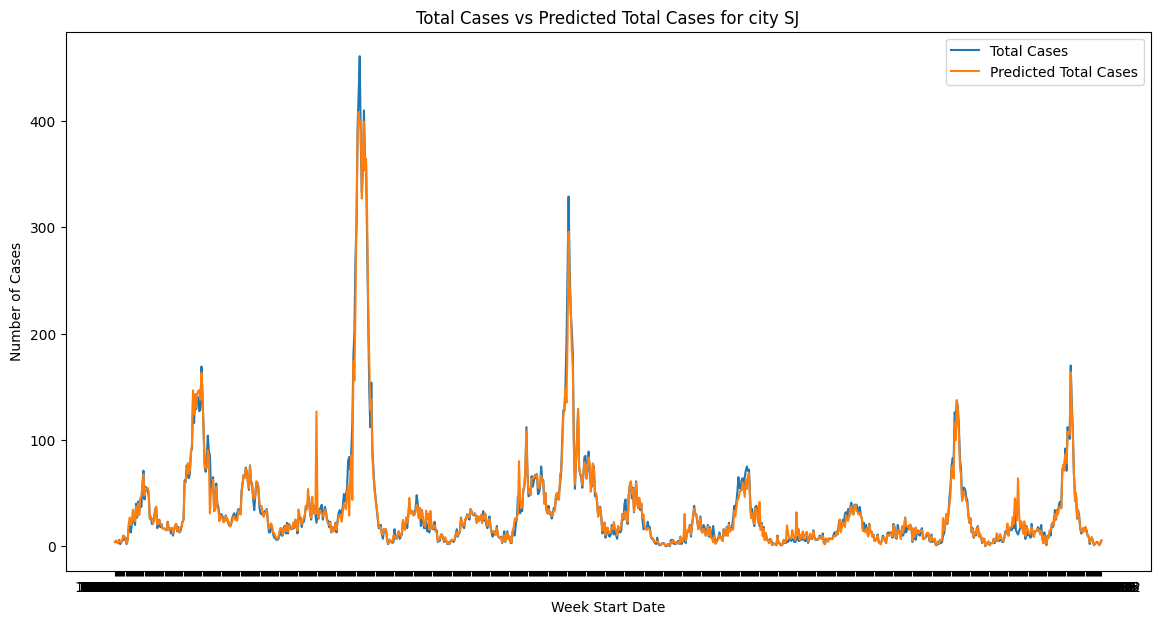

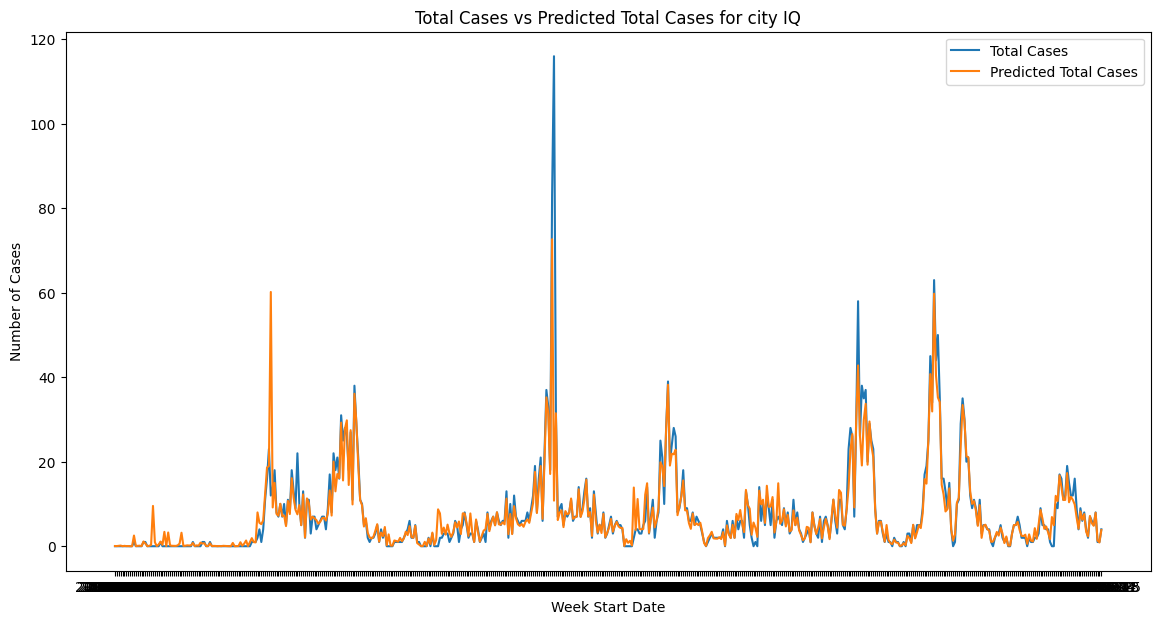

In [142]:
import matplotlib.pyplot as plt

# Filter the data for city 'sj'
sj_data = dengue_features_train_df[dengue_features_train_df['city'] == 'sj']

# Plot total_cases and predicted_total_cases for city 'sj'
plt.figure(figsize=(14, 7))
plt.plot(sj_data['week_start_date'], sj_data['total_cases'], label='Total Cases')
plt.plot(sj_data['week_start_date'], sj_data['predicted_total_cases'], label='Predicted Total Cases')
plt.xlabel('Week Start Date')
plt.ylabel('Number of Cases')
plt.title('Total Cases vs Predicted Total Cases for city SJ')
plt.legend()
plt.show()

# Filter the data for city 'iq'
iq_data = dengue_features_train_df[dengue_features_train_df['city'] == 'iq']

# Plot total_cases and predicted_total_cases for city 'iq'
plt.figure(figsize=(14, 7))
plt.plot(iq_data['week_start_date'], iq_data['total_cases'], label='Total Cases')
plt.plot(iq_data['week_start_date'], iq_data['predicted_total_cases'], label='Predicted Total Cases')
plt.xlabel('Week Start Date')
plt.ylabel('Number of Cases')
plt.title('Total Cases vs Predicted Total Cases for city IQ')
plt.legend()
plt.show()


## Suggested Next Steps

Consider trying a simple Decision Tree Regressor which is a simpler model than the Random Forest Regressor
and compare the results.

Also explore what features are most important to the model.
